# Sub-band decomposition
The main idea of this notebook is to show how the reconstruction after filtering affects the integrity of the signal. In most of acustic parameters calculation software, simple butterworth filters are used to split the initial signal in to sub-frequency bands. Whit this, if then the bands are summed-up in order to re-obtain the initial signal, an amount of distortion can be noticed beacuse of the non-unitary response of butterworth filterbank. However, this work implement complementary butterwroth filter bank, which means that the filters who compose the filterbank have an unitary gain response together, in order to allow to recover the initial signal from summing up the filtered bands.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from load import RIR                                                                                                                    
from acoustic_params import Acoustic_params                                                                                             
from filterbank import Filterbank
from IPython.display import Audio

In [9]:
impulso = RIR('files/rir.wav', fs = 16000)                                                                                              
a_params = Acoustic_params(impulso.late, impulso.fs)                                                                                    
a_params.reverberation_time()                                                                                                           
                                                                                                                                        
params = {'fs' : 16000,                                                                                                                 
              'bands' : [125, 350, 500, 1000, 2000, 4000],                                                                              
              'bandsize' : 1,                                                                                                           
              'order' : 4,                                                                                                              
              'f_length': 16384,                                                                                                        
              'power' : True}                                                                                                           
                                                                                                                                        
                                                                                                                                        
filterbank = Filterbank(**params)                                                                                                       
bandas = filterbank.apply(impulso.late)
recover = np.sum(bandas, axis=0)
diff = abs(recover - impulso.late)

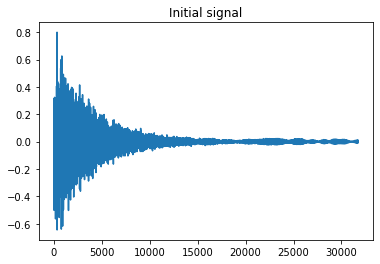

In [21]:
plt.title('Initial signal')
plt.plot(recover); plt.show()

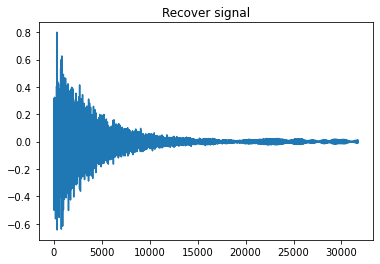

In [22]:
plt.title('Recover signal')
plt.plot(impulso.late); plt.show()

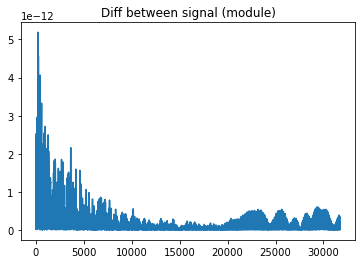

In [24]:
plt.title('Diff between signal (module)')
plt.plot(diff);plt.show()

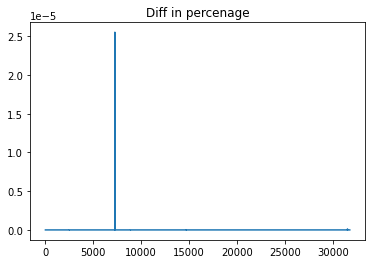

In [25]:
plt.title('Diff in percenage')
plt.plot(diff / abs(impulso.late)); plt.show()

Also, we can perceive theese little differencies in the decimal expressions of the signal values

In [30]:
impulso.late[100]

-0.13526728156142065

In [31]:
recover[100]

-0.13526728156177925